In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv(r"E:\data analyze tools\titanic survival pred proj\titanic (1)\gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
df=pd.read_csv(r"E:\data analyze tools\titanic survival pred proj\titanic (1)\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.duplicated().sum()

0

In [19]:
df.value_counts().sum()

183

In [21]:
df.shape

(891, 12)

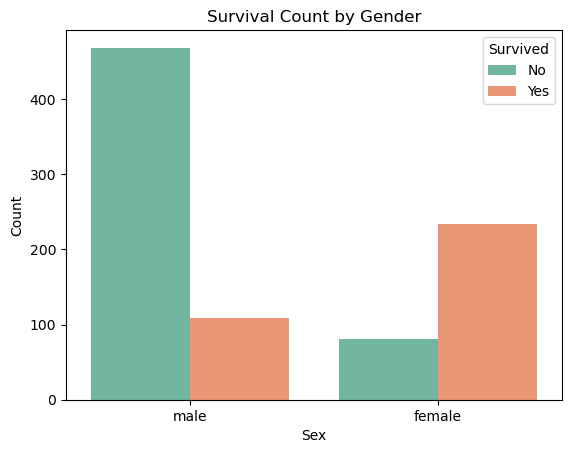

In [23]:
sns.countplot(df, x='Sex', hue='Survived', palette='Set2')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived',labels=['No','Yes'])
plt.title('Survival Count by Gender')
plt.show()

In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
df[['Sex','Survived']].head(20)

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


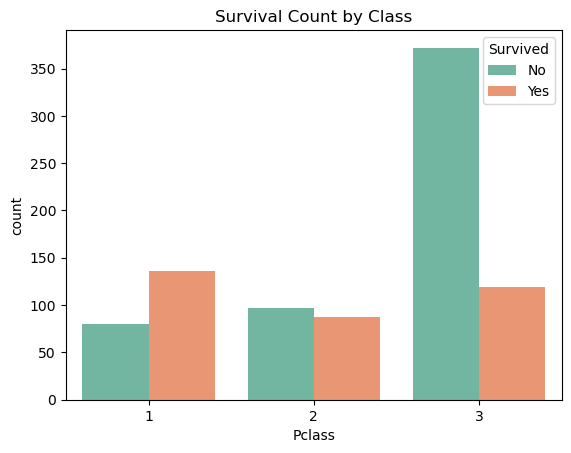

In [29]:
sns.countplot(df, x='Pclass', hue='Survived', palette='Set2')
plt.legend(title='Survived',labels=['No','Yes'])
plt.title('Survival Count by Class')
plt.show()

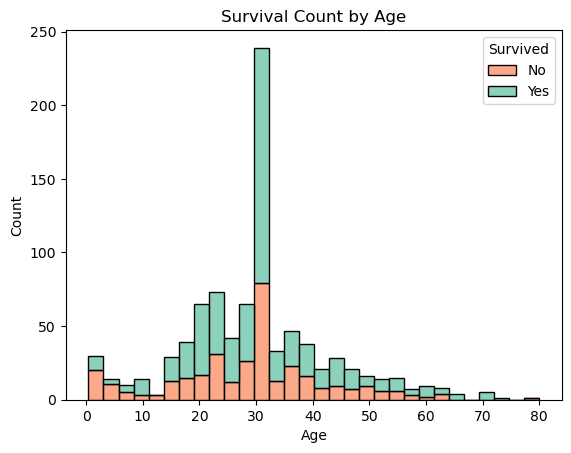

In [31]:
sns.histplot(df, x='Age', hue='Survived', palette='Set2', multiple='stack')
plt.legend(title='Survived',labels=['No','Yes'])
plt.title('Survival Count by Age')
plt.show()

In [33]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [35]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [37]:
df['familysize']=df['SibSp']+df['Parch']+1
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,familysize,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,2,True
1,2,1,1,38.0,1,0,71.2833,C,2,False
2,3,1,3,26.0,0,0,7.9250,S,1,False
3,4,1,1,35.0,1,0,53.1000,S,2,False
4,5,0,3,35.0,0,0,8.0500,S,1,True


In [39]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'].head()
df['Age'].isna().sum()

0

In [41]:
df.drop(['Name','Ticket','Cabin'],axis='columns', inplace=True)
df.head()

KeyError: "['Name', 'Ticket', 'Cabin'] not found in axis"

In [42]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,familysize,Sex_male
0,1,0,3,22.000000,1,0,7.2500,S,2.0,True
1,2,1,1,38.000000,1,0,71.2833,C,2.0,False
2,3,1,3,26.000000,0,0,7.9250,S,1.0,False
3,4,1,1,35.000000,1,0,53.1000,S,2.0,False
4,5,0,3,35.000000,0,0,8.0500,S,1.0,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1.0,True
887,888,1,1,19.000000,0,0,30.0000,S,1.0,False
888,889,0,3,29.699118,1,2,23.4500,S,4.0,False
889,890,1,1,26.000000,0,0,30.0000,C,1.0,True


In [44]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df.head()

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

In [45]:
df['familysize']=df['familysize'].astype(float)


In [46]:
df=pd.get_dummies(df,columns=['Embarked'], drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2.0,1,0,1
1,2,1,1,38.0,1,0,71.2833,2.0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1.0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2.0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1.0,1,0,1


In [47]:
df = pd.get_dummies(df, columns=["Pclass"], drop_first=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,2.0,1,0,1,False,True
1,2,1,38.0,1,0,71.2833,2.0,0,0,0,False,False
2,3,1,26.0,0,0,7.9250,1.0,0,0,1,False,True
3,4,1,35.0,1,0,53.1000,2.0,0,0,1,False,False
4,5,0,35.0,0,0,8.0500,1.0,1,0,1,False,True


In [48]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [49]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,2.0,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,2.0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,1.0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,2.0,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1.0,1,0,1,0,1


In [50]:
x=df.drop(['Survived'],axis=1)
x.head()

,PassengerId,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,2.0,1,0,1,0,1
1,2,38.0,1,0,71.2833,2.0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1.0,0,0,1,0,1
3,4,35.0,1,0,53.1000,2.0,0,0,1,0,0
4,5,35.0,0,0,8.0500,1.0,1,0,1,0,1


In [51]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [53]:
pred_survived=model.predict(x_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_survived))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.71      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [55]:
confusion_matrix(y_test, pred_survived, labels=[1,0])

array([[ 72,  28],
       [ 29, 139]], dtype=int64)

In [56]:
test_set=pd.read_csv(r"E:\data analyze tools\titanic survival pred proj\titanic (1)\test.csv")
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
test_set['familysize']=test_set['SibSp']+test_set['Parch']+1
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [58]:
test_set['Age']=test_set['Age'].fillna(test_set['Age'].mean())
test_set['Age'].head()
test_set['Age'].isna().sum()

0

In [59]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  familysize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [60]:
test_set.drop(['Name','Ticket','Cabin'],axis='columns', inplace=True)
test_set=pd.get_dummies(test_set,columns=['Sex'],drop_first=True)
test_set['familysize']=test_set['familysize'].astype(float)
test_set=pd.get_dummies(test_set,columns=['Embarked'], drop_first=True)
test_set = pd.get_dummies(test_set, columns=["Pclass"], drop_first=True)


In [61]:
test_set = test_set.astype({col: 'int' for col in test_set.select_dtypes('bool').columns})
test_set.head()

,PassengerId,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1.0,1,1,0,0,1
1,893,47.0,1,0,7.0000,2.0,0,0,1,0,1
2,894,62.0,0,0,9.6875,1.0,1,1,0,1,0
3,895,27.0,0,0,8.6625,1.0,1,0,1,0,1
4,896,22.0,1,1,12.2875,3.0,0,0,1,0,1


In [62]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   familysize   418 non-null    float64
 6   Sex_male     418 non-null    int32  
 7   Embarked_Q   418 non-null    int32  
 8   Embarked_S   418 non-null    int32  
 9   Pclass_2     418 non-null    int32  
 10  Pclass_3     418 non-null    int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 27.9 KB


In [63]:
test_set['Fare']=test_set['Fare'].fillna(test_set['Fare'].mean())

In [64]:
pre=model.predict(test_set)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
pre_set=pd.DataFrame(pre, columns=['Survival'])
pre_set

,Survival
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [76]:
test_set['Survival']=pre_set['Survival']

In [77]:
test_set

,PassengerId,Age,SibSp,Parch,Fare,familysize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Survival
0,892,34.50000,0,0,7.8292,1.0,1,1,0,0,1,0
1,893,47.00000,1,0,7.0000,2.0,0,0,1,0,1,1
2,894,62.00000,0,0,9.6875,1.0,1,1,0,1,0,0
3,895,27.00000,0,0,8.6625,1.0,1,0,1,0,1,0
4,896,22.00000,1,1,12.2875,3.0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,1.0,1,0,1,0,1,0
414,1306,39.00000,0,0,108.9000,1.0,0,0,0,0,0,1
415,1307,38.50000,0,0,7.2500,1.0,1,0,1,0,1,0
416,1308,30.27259,0,0,8.0500,1.0,1,0,1,0,1,0


In [78]:
pre_set['PassengerId']=test_set['PassengerId']
pre_set

,Survival,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308
